In [ ]:
# import pandas as pd

# # Load the dataset, handling potential errors
# try:
#     # Use 'on_bad_lines' instead of the deprecated 'error_bad_lines'
#     df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip', quoting=3)  # Skip bad lines
# except pd.errors.ParserError as e:
#     print(f"Error reading CSV: {e}")
#     # Attempt to extract row number from error message (may not always work)
#     try:
#         row_number = int(str(e).split('row ')[1].split(',')[0])
#         print(f"Problem likely around row: {row_number}")
#     except (IndexError, ValueError):
#         print("Could not determine specific row number from the error.")

# # Basic EDA
# if 'df' in locals():  # Proceed with EDA only if DataFrame was loaded successfully
#     print(df.head())
#     print(df['sentiment'].value_counts())


import pandas as pd

# Load the dataset, skipping bad lines
df = pd.read_csv('/content/IMDB Dataset.csv')


In [ ]:
print(df.head(10))  # View the first 10 rows
print(df.info())     # Get information about data types and non-null counts
print(df.describe())  # Get summary statistics for numerical columns (if any)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
N

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

Series([], dtype: int64)


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


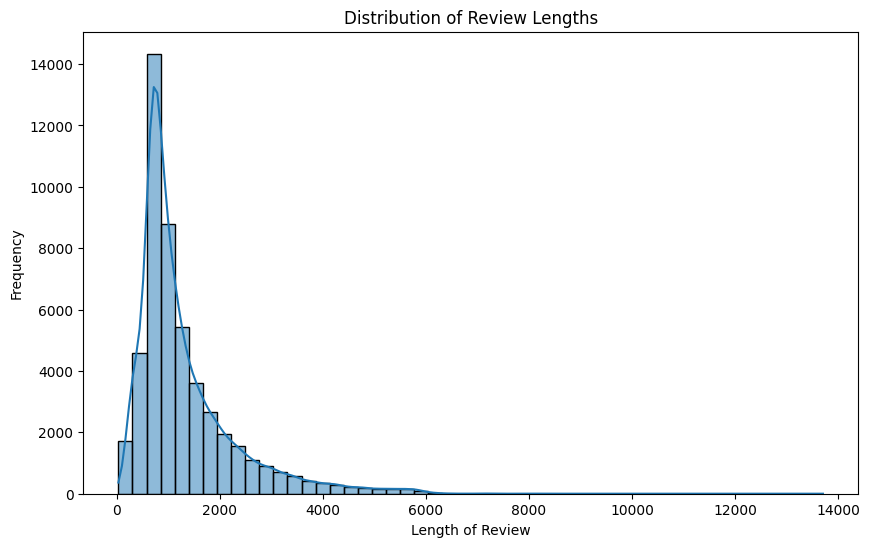

In [ ]:
import matplotlib.pyplot as plt
df['review'] = df['review'].astype(str)
df['review_length'] = df['review'].apply(len)
print(df['review_length'].describe())  # Summary statistics for review lengths

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert reviews to lowercase
df['review'] = df['review'].str.lower()
print("After lowercasing:\n", df['review'].head())

After lowercasing:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


In [ ]:
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

df['review'] = df['review'].apply(remove_html)
print("After removing HTML tags:\n", df['review'].head())

<ipython-input-30-5d27e10eeb19>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


After removing HTML tags:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


In [ ]:
from bs4 import BeautifulSoup

# Function to check for a specific HTML tag
def find_tag(text, tag):
    soup = BeautifulSoup(text, "html.parser")
    return soup.find(tag) is not None
# Check for the presence of a specific tag in the 'review' column
df['has_p_tag'] = df['review'].apply(lambda x: find_tag(x, 'p'))

# Print the rows where the tag is found
print("Rows with <p> tags:\n", df[df['has_p_tag']])


<ipython-input-31-073fe3454cd1>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Rows with <p> tags:
 Empty DataFrame
Columns: [review, sentiment, review_length, has_p_tag]
Index: []


In [ ]:
print (df.columns)

Index(['review', 'sentiment', 'review_length', 'has_p_tag'], dtype='object')


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ... (Your previous code to load and preprocess data)

# Ensure 'review' column contains strings before applying .str
df['review'] = df['review'].astype(str)  # Convert to string type

df['review'] = df['review'].str.translate(str.maketrans('', '', string.punctuation))
print("After removing punctuation:\n", df['review'].head())

# Step 4: Removing Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print("After removing stopwords:\n", df['review'].head())
# Step 5: Tokenization
df['review'] = df['review'].apply(lambda x: x.split())
print("After tokenization:\n", df[['review']].head()) # Changed line to only select the 'review' column
#Instead of df[['review','tokens']] only review is used, as that is the only relevant column name.


# Final Review Length Check
df['cleaned_review_length'] = df['review'].apply(len)
print("Review lengths after preprocessing:\n", df[['cleaned_review_length']].describe())

After removing punctuation:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After removing stopwords:
 0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object
After tokenization:
                                               review
0  [one, reviewers, mentioned, watching, 1, oz, e...
1  [wonderful, little, production, filming, techn...
2  [thought, wonderful, way, spend, time, hot, su...
3  [basically, theres, family, little, boy, jake,...
4  [petter, matteis, love, time, money, visually,...
Review lengths after preprocessing:
        cleaned_review_length
count           50000.000000
mean              119.857060
std                90.098325
min                 3.000000
25%                64.000000
50%                89.000000
75%               146.000000
max              1429.000000


In [ ]:
# Encode the sentiment labels (positive = 1, negative = 0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Verify the encoding
print("Encoded Sentiment Sample:")
print(df[['review', 'sentiment', 'label']].head())


Encoded Sentiment Sample:
                                              review sentiment  label
0  [one, reviewers, mentioned, watching, 1, oz, e...  positive      1
1  [wonderful, little, production, filming, techn...  positive      1
2  [thought, wonderful, way, spend, time, hot, su...  positive      1
3  [basically, theres, family, little, boy, jake,...  negative      0
4  [petter, matteis, love, time, money, visually,...  positive      1


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Size: {len(X_train)} reviews")
print(f"Testing Data Size: {len(X_test)} reviews")
print (X_train)
print (X_test)
print (y_train)
print (y_test)


Training Data Size: 40000 reviews
Testing Data Size: 10000 reviews
39087    [thats, kept, asking, many, fights, screaming,...
30893    [watch, entire, movie, could, watch, entire, m...
45278    [touching, love, story, reminiscent, in, mood...
16398    [latterday, fulci, schlocker, totally, abysmal...
13653    [first, firmly, believe, norwegian, movies, co...
                               ...                        
11284    [shadow, magic, recaptures, joy, amazement, fi...
44732    [found, movie, quite, enjoyable, fairly, enter...
38158    [avoid, one, terrible, movie, exciting, pointl...
860      [production, quite, surprise, absolutely, love...
15795    [decent, movie, although, little, bit, short, ...
Name: review, Length: 40000, dtype: object
33553    [really, liked, summerslam, due, look, arena, ...
9427     [many, television, shows, appeal, quite, many,...
199      [film, quickly, gets, major, chase, scene, eve...
12447    [jane, austen, would, definitely, approve, one...
39489

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Join tokenized words back into sentences
X_train_str = X_train.apply(lambda x: ' '.join(x))
X_test_str = X_test.apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train_str)
X_test_bow = vectorizer.transform(X_test_str)

# Convert the sparse matrix to a dense DataFrame for better readability
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
X_test_bow_df = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Print the entire Bag of Words matrix
print("Bag of Words - Training Data (Top 10 Rows):")
print(X_train_bow_df.head(10))  # Display the first 10 rows for readability

# Print the shape of the BoW matrix
print("\nShape of the BoW matrix (Training):", X_train_bow.shape)
print("Shape of the BoW matrix (Testing):", X_test_bow.shape)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# Make predictions
y_pred_bow = nb_model.predict(X_test_bow)

# Evaluate the model
print("\nNaive Bayes (Bag of Words) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print(classification_report(y_test, y_pred_bow))


Bag of Words - Training Data (Top 10 Rows):
   10  100  1010  11  110  12  13  13th  14  15  ...  youll  young  younger  \
0   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
1   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
2   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
3   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
4   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
5   0    0     0   0    0   0   0     0   0   0  ...      1      0        0   
6   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
7   1    0     0   0    0   0   0     0   0   0  ...      0      0        0   
8   0    0     0   0    0   0   0     0   0   0  ...      0      0        0   
9   0    0     0   0    0   0   0     0   0   0  ...      1      0        0   

   youre  youth  youve  zero  zombie  zombies  zone  
0      0      0      0     0    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
print("before making the chnages the x_train")
print(X_train)
print("after making the changes the x_train")
print(X_train_str)
print("before making the chnages the x_test")
print(X_test)
print("after making the changes the x_test")
print(X_test_str)
# Step 1: Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
print("Initialized TF-IDF Vectorizer with max_features=5000.")

# Step 2: Transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
print("\nTF-IDF Transformation on Training Data Complete:")
print(f"Shape of Training Data TF-IDF Matrix: {X_train_tfidf.shape}")  # Shape of training TF-IDF matrix
print("TF-IDF Training Data Sample Values (Dense Format):")
print(X_train_tfidf.toarray())  # Print TF-IDF values for training data

# Step 3: Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)
print("\nTF-IDF Transformation on Test Data Complete:")
print(f"Shape of Test Data TF-IDF Matrix: {X_test_tfidf.shape}")  # Shape of test TF-IDF matrix
print("TF-IDF Test Data Sample Values (Dense Format):")
print(X_test_tfidf.toarray())  # Print TF-IDF values for test data

# Step 4: Train SVM model
svm_model = SVC(kernel='linear', probability=True)
print("\nInitialized SVM Model with Linear Kernel.")
svm_model.fit(X_train_tfidf, y_train)
print("SVM Model Training Complete.")

# Step 5: Make predictions
y_pred_tfidf = svm_model.predict(X_test_tfidf)
print("\nPredictions Made on Test Data:")
print("Predicted Labels:", y_pred_tfidf)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tfidf)
print("\nEvaluation of SVM (TF-IDF) Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tfidf))


before making the chnages the x_train
39087    [thats, kept, asking, many, fights, screaming,...
30893    [watch, entire, movie, could, watch, entire, m...
45278    [touching, love, story, reminiscent, in, mood...
16398    [latterday, fulci, schlocker, totally, abysmal...
13653    [first, firmly, believe, norwegian, movies, co...
                               ...                        
11284    [shadow, magic, recaptures, joy, amazement, fi...
44732    [found, movie, quite, enjoyable, fairly, enter...
38158    [avoid, one, terrible, movie, exciting, pointl...
860      [production, quite, surprise, absolutely, love...
15795    [decent, movie, although, little, bit, short, ...
Name: review, Length: 40000, dtype: object
after making the changes the x_train
39087    thats kept asking many fights screaming matche...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent in mood love ...
16398    latterday fulci schlocker totally abysmal conc.

In [ ]:
from wordcloud import WordCloud

all_reviews = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()